In [1]:
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
import seaborn as sns

<Axes: ylabel='Density'>

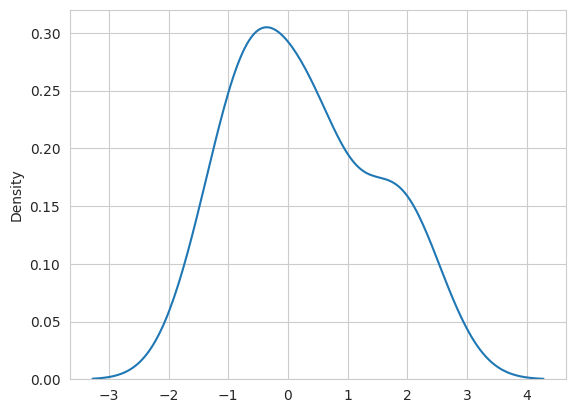

In [2]:
data = [-0.292562, 1.948345, -1.257391, -0.716818, 0.275789, -0.989609, -1.506731, 1.595805, 1.706791, 0.705075, 0.182338, 0.901958, -0.638299, -0.550975, -0.668932, -0.334064, 2.516108, 1.984384, 0.289034, 0.467767]

sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw_method=0.5)

In [4]:
Data = [[0.837369, -1.514543 ],
[0.569554, -1.431901 ],
[-0.102325, -1.291255 ],
[0.221401, -0.950570 ],
[0.042617, -0.734413 ],
[0.798538, -1.069632 ],
[0.758289, -1.424626 ],
[1.177049, -1.313818 ],
[0.197426, -0.994861 ],
[0.257168, -1.404989 ] ]

Data = np.array(Data)
Data.shape

x = Data[:, 0]
y = Data[:, 1]

<Axes: ylabel='Density'>

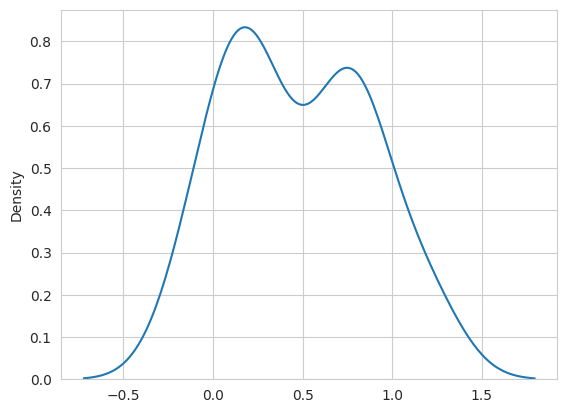

In [5]:
sns.set_style('whitegrid')
sns.kdeplot(x, bw_method=0.5)

<Axes: ylabel='Density'>

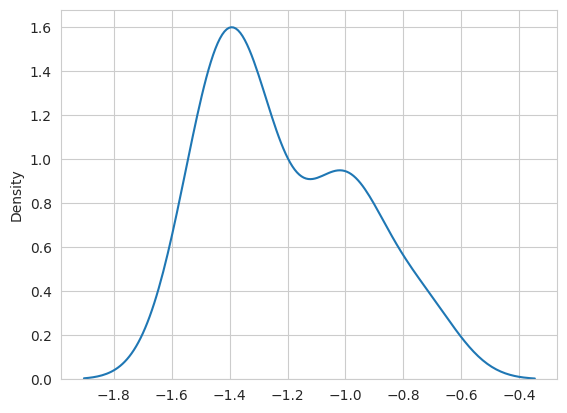

In [6]:
sns.set_style('whitegrid')
sns.kdeplot(y, bw_method=0.5)

In [7]:
def ObtenerNums(file_name):
    numbers = []

    with open(file_name, 'r') as file:
        for line in file:
            # Strip the newline character and convert to integer
            string_line = StringIO(line)
            numbers.append(np.loadtxt(string_line) )
        numbers = np.array(numbers)

    return numbers

In [19]:
Data = ObtenerNums("Initial_Pop.txt")

(array([40., 38., 30., 24., 43., 29., 39., 27., 34., 33., 30., 27., 29.,
        37., 34., 35., 34., 33., 35., 27., 31., 31., 22., 38., 37., 30.,
        39., 37., 39., 38.]),
 array([ 0.044234 ,  1.0337292,  2.0232244,  3.0127196,  4.0022148,
         4.99171  ,  5.9812052,  6.9707004,  7.9601956,  8.9496908,
         9.939186 , 10.9286812, 11.9181764, 12.9076716, 13.8971668,
        14.886662 , 15.8761572, 16.8656524, 17.8551476, 18.8446428,
        19.834138 , 20.8236332, 21.8131284, 22.8026236, 23.7921188,
        24.781614 , 25.7711092, 26.7606044, 27.7500996, 28.7395948,
        29.72909  ]),
 <BarContainer object of 30 artists>)

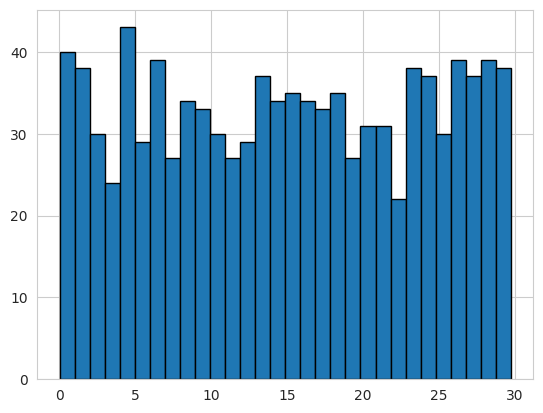

In [25]:
V = Data[:, 4]

plt.hist(V, bins=30, edgecolor='black')
# sns.set_style('whitegrid')
# sns.kdeplot(V, bw_method=0.5)

### Gráficas de Convergencia

In [ ]:
def Sinoidal(x, y):
    # Dominio: [-2,2]x[-2,2]
    # Minimo: f(0,0) = 0.1
    t1 = x*x + y*y
    t2 = np.sin(5*x)
    t3 = np.sin(5*y)
    t = t1 + np.sqrt(t2*t2 + t3*t3) + 0.1

    return t

In [36]:
def Michealwicz(x, y):
    # Dominio: [0,4]x[0,4]
    # Minimo: f(2.20319,1.57049) = - 1.801

    t1 = -np.sin( x )
    t2 = np.sin( (x*x) / np.pi )
    t3 = pow( t2, 20.0 )

    r1 = -np.sin( y );
    r2 = np.sin( (2*y*y) / np.pi )
    r3 = pow( r2, 20.0 )

    return ( t1*t3 + r1*r3 )

In [37]:
# Generar una malla
# x = np.linspace(-2.0, 2.0, 400)
# y = np.linspace(-2.0, 2.0, 400)
# X, Y = np.meshgrid(x, y)

# Obtenemos la imagen
# Z = Sinoidal(X, Y)


# Generar una malla
x = np.linspace(0.0, 4.0, 400)
y = np.linspace(0.0, 4.0, 400)
X, Y = np.meshgrid(x, y)

Z = Michealwicz(X, Y)

In [ ]:
# P = ObtenerNums("Initial_Pop.txt")

# plt.figure()
# cp = plt.contour(X, Y, Z)
# plt.clabel(cp, inline=True, fontsize=10)
# plt.scatter( P[:, 0], P[:, 1], color='red', marker='o')

# plt.title('Gráfica de Contorno de la Función Sinoiodal: Población Inicial')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

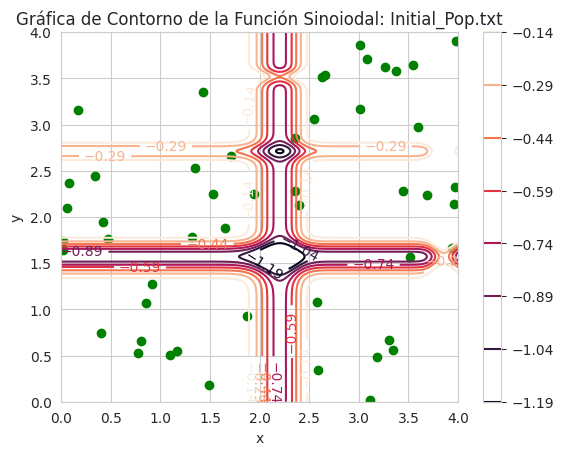

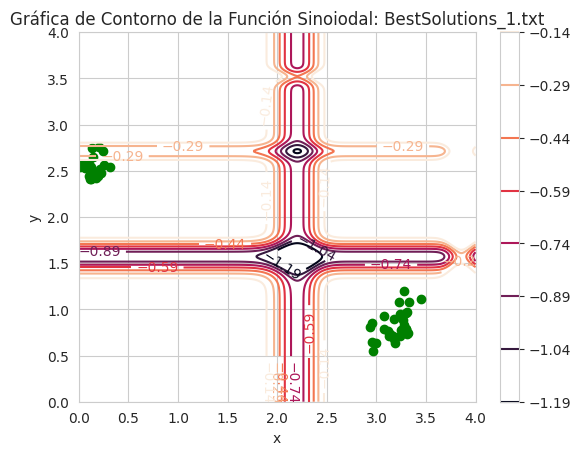

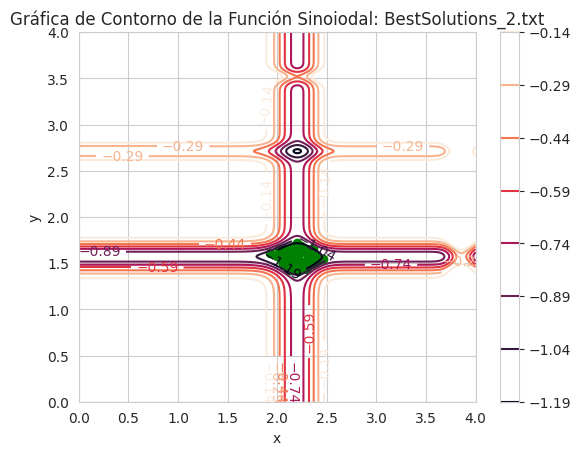

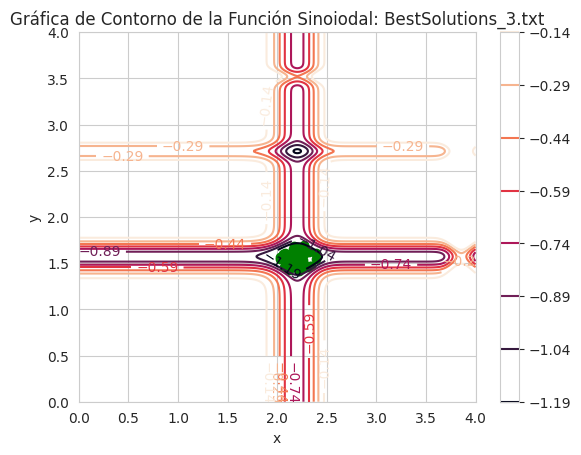

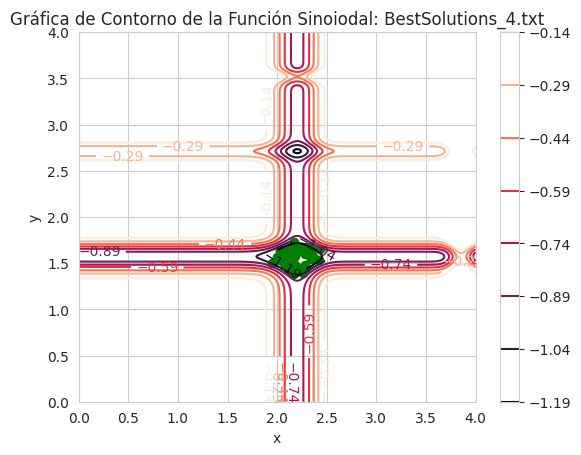

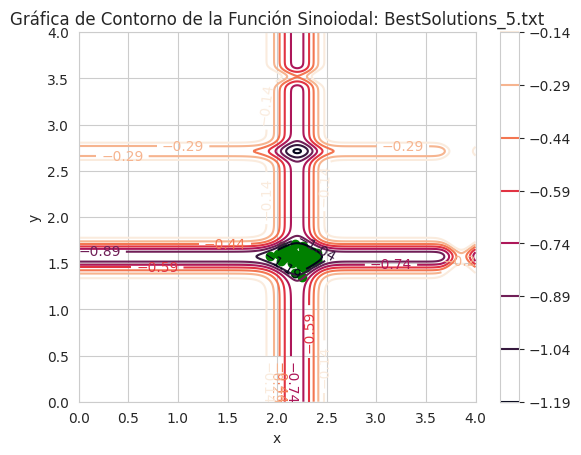

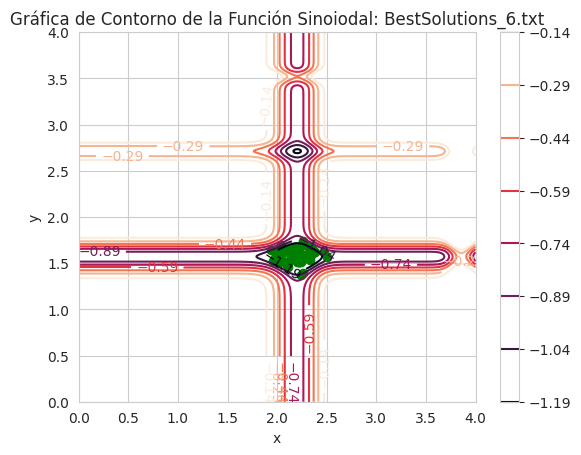

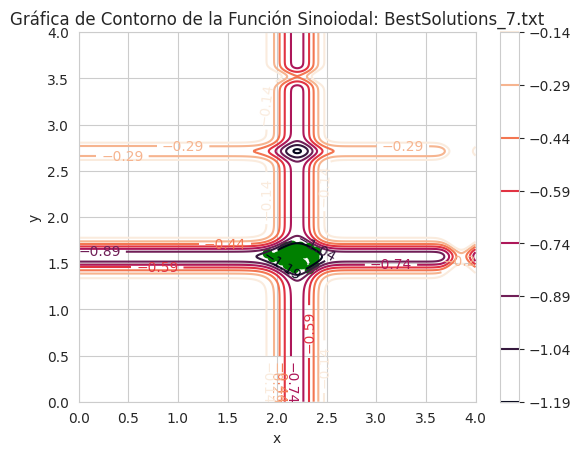

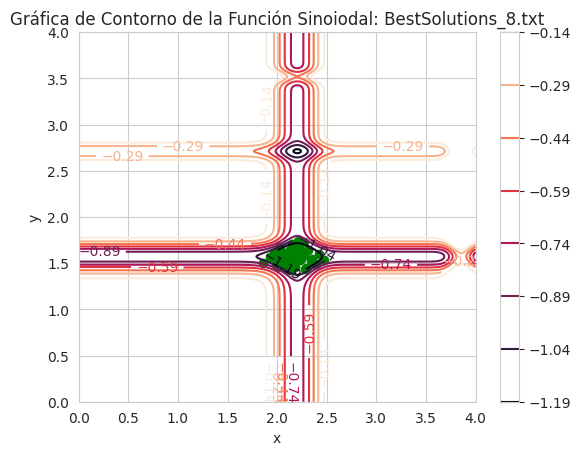

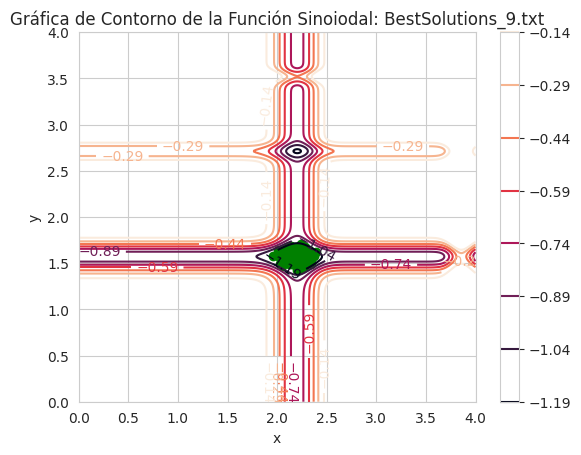

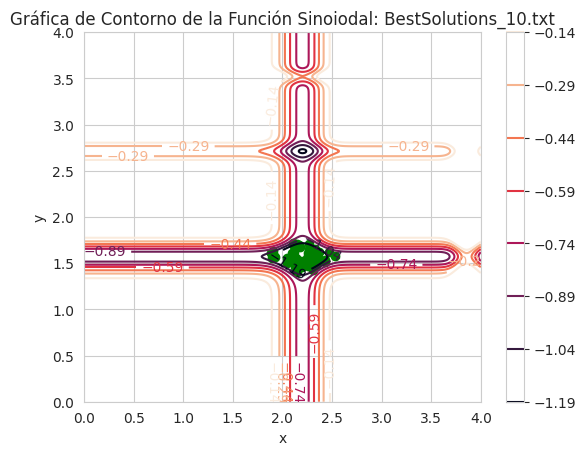

In [42]:
file_names = ["Initial_Pop.txt",
              "BestSolutions_1.txt",
              "BestSolutions_2.txt",
              "BestSolutions_3.txt",
              "BestSolutions_4.txt",
              "BestSolutions_5.txt",
              "BestSolutions_6.txt",
              "BestSolutions_7.txt",
              "BestSolutions_8.txt",
              "BestSolutions_9.txt",
              "BestSolutions_10.txt"
              ]

for name in file_names:
    P = ObtenerNums(name)

    plt.figure()
    levels = np.arange( -1.19, 0.0, 0.15)
    cp = plt.contour(X, Y, Z, levels=levels)
    plt.colorbar();
    plt.clabel(cp, inline=True, fontsize=10)
    plt.scatter( P[:, 0], P[:, 1], color='green', marker='o')

    plt.title('Gráfica de Contorno de la Función Sinoiodal: {}'.format(name))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

## Problema Original

In [124]:
P_SSE = np.array([0.450395, 0.123283, 0.582946, 0.141850, 28.563723 ])
P_SAE = np.array([0.498393, 0.098637, 0.479931, 0.147505, 28.568213 ])
P_MAE = np.array([0.492222, 0.092540, 0.587427, 0.129544, 27.999712 ])
Pp = np.array([0.432, 0.123, 0.041364, 0.108, 29.4])

x = np.array([0.005019, 0.010038, 0.015, 0.019962, 0.0258365, 0.030057, 0.0317681, 0.0319962, 0.0330228, 0.0337072])
y = np.array([0.69844, 0.6125, 0.58281, 0.5375, 0.47344, 0.36563, 0.31094, 0.2625, 0.2, 0.11094])


In [125]:
def funcionParam(P):
    def funobj(x):
        val = P[0] - P[1]*np.log10(x) - P[2]*x + P[3]*np.log(1.0 - P[4]*x);
        return val
    return funobj

Func_SAE = funcionParam(P_SAE)
Func_SSE = funcionParam(P_SSE)
Func_MAE = funcionParam(P_MAE)


# def Funcion(x):
#     val = P[0] - P[1]*np.log10(x) - P[2]*x + P[3]*np.log(1.0 - P[4]*x);

#     return val

In [126]:
y_SSE = Func_SSE(x)
y_SAE = Func_SAE(x)
y_MAE = Func_MAE(x)

In [127]:
d = np.linspace(0.00001, 0.0342, 100)
fd_SSE = Func_SSE(d)
fd_SAE = Func_SAE(d)
fd_MAE = Func_MAE(d)

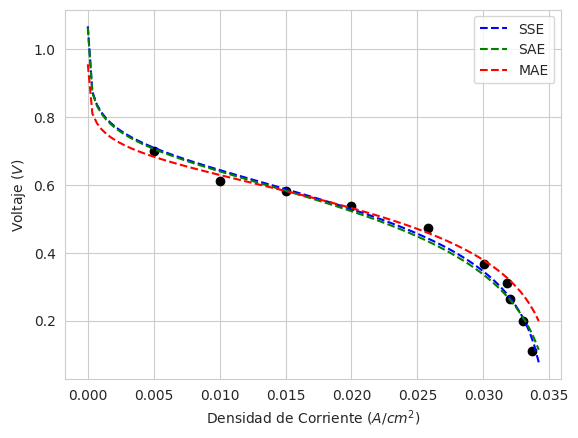

In [128]:
# plt.scatter( x, y_hat )
plt.scatter( x, y, color = 'black')
plt.plot(d, fd_SSE, "b--", label='SSE' )
plt.plot(d, fd_SAE, "g--", label='SAE' )
plt.plot(d, fd_MAE, "r--", label='MAE' )

plt.xlabel("Densidad de Corriente ($A/cm^2$)")
plt.ylabel("Voltaje ($V$)")
plt.legend()

plt.show()

In [129]:
def SSE(y1, y2):
    val = np.sum((y1 - y2) ** 2)

    return val

def SAE(y1, y2):
    val = np.sum(np.abs(y1 - y2))

    return val

def MAE(y1, y2):
    absolute_errors = np.abs(y1 - y2)
    median_ae = np.median(absolute_errors)
    return median_ae


In [130]:
error_sse = SSE(y, y_SSE)
error_sae = SAE(y, y_SAE)
error_mae = MAE(y, y_MAE)

print("error_sse : ", error_sse)
print("error_sae : ", error_sae)
print("error_mae : ", error_mae)

error_sse :  0.004975120632109049
error_sae :  0.21791554677515368
error_mae :  0.015978632497248707
